In [1]:
## Import all libraries:

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data handling libraries
import numpy as np
import pandas as pd

# Time for the control of the timing for proccesses
import time

# Data acquisition and saving files
import requests
import json
import os

# Data visualization
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

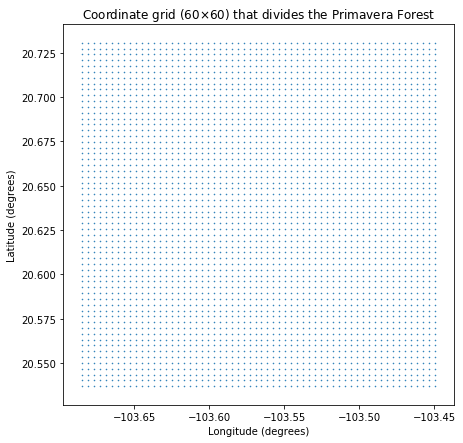

In [2]:
# Determine geospacial delimitations for the Primavera Forest 

# Delimitation coordinates
lat1, lon1 = 20.730654, -103.684725
lat2, lon2 = 20.536931, -103.684725
lat3, lon3 = 20.536931, -103.449552
lat4, lon4 = 20.730654, -103.449552
del_lat = [lat1,lat2,lat3,lat4]
del_lon = [lon1,lon2,lon3,lon4]

# Generate a grid for the data points:
lat_numbers = 60
lon_numbers = 60
lat_vector = np.linspace(min(del_lat), max(del_lat), lat_numbers)
lon_vector = np.linspace(min(del_lon), max(del_lon), lon_numbers)
lon,lat = np.meshgrid(lon_vector,lat_vector)

# Have all the coordinates in a vector and in a dataframe
coordinates = [[lat,lon] for lat in lat_vector for lon in lon_vector]
coordinates_df = pd.DataFrame(coordinates, columns=['latitude','longitude'])

# Plot the figure
plt.figure(figsize=(7,7))
plt.scatter(lon,lat, s=.3)
plt.title(f'Coordinate grid ({lon_numbers}$\\times${lat_numbers}) that divides the Primavera Forest')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.show()

In [ ]:
# API Consumption, do not run unless you know what you are doing

#List of API keys
keys = ['7b708365481605dc3f5873d079428b13','f6a3f1451c57f3c47462789d7fd7db67','0184dd7d5e28a74578c3d896ec8ba417', '16128d728acfa488b037d5752b4dad5c']

# Desired URL for API
url = 'https://api.darksky.net/forecast/'

## Initialize variables and flags

# Information will be stored here
info = []

# There will be a register of the times a key will be used
count = 0

# There will be a register of how many times the key is working
i = 0

# Key that will be used first
key = 0

# Value of the grid that will be used first
val = 0

# Number of erros in the code
flag = 0

# While loop that will go on for all the expected values 'i', but will stop if there are 10 errors in a row.

while i < 3600 and flag <= 10:
    # Get the information for each coordinates
    for coordinate in coordinates[val:]:
        try:
            #Get the information from the api
            loc_time = (f'{coordinate[0]},{coordinate[1]},1335024000')
            information = requests.get(f'{url}{keys[key]}/{loc_time}').json()
            
            #Add the information to the info vector
            info.append(information)
            
            # Reset the number of errors to 0
            flag = 0
            
            # Increase the uses of key
            count += 1
            
            # Once the count reaches 900, we will use another key, and reestart the counter
            if count == 900:
                count = 0
                key += 1
                
            #Each time a call is done succesffully we will increase this counter
            i+=1
            
        # If the previous code has an error this will happen:
        except:
            
            # We will increase the number of errors by one
            flag+=1
            
            # we will print which iteration is
            print(i,coordinates.index(coordinate))
            
            # we will create a variable called saveprocess with all the previous information
            saveprocess = info
            
            # we will find the index value of the coordinate
            val = coordinates.index(coordinate)
            
            # we will create a temporary file name
            date = '04_21_2012_16_f_temporary'
            
            # we will save the information on the file name
            with open(f'./Datos_meteorologicos/{date}.json', 'w') as fout:
                json.dump(saveprocess, fout)
            
            # we will wait 20 seconds 
            time.sleep(20)
            
            # we will get out of the "for" loop
            break
            
            # since the code is in a "while" loop, it will do again the "for" loop but  the variable
            # 'val' will be actualized to the point we stood in.  

# If the while loop is broken because of the number of errors, we will print that the code didnt work
if i <= 3600:
    if flag != 0:
        print ('Sorry code will not work for now')

    # If the while loop ends succesffuly, the number of errors should be '0' and therefore we will save the data
    else:
        date = '04_21_2012_16_f'
        print (f'Success: completed the data mining for {date}')
        with open(f'./Datos_meteorologicos/{date}.json', 'w') as fout:
            json.dump(info, fout)
else:
    print('Something went terribly wrong')

1662 1662
